In [4]:
import pandas as pd
from prettytable import PrettyTable

In [28]:
data_covid19 = pd.read_csv('/home/hadoop/dataset/caso_covid_brazil.csv');

In [29]:
data_covid19_amazonas = data_covid19[data_covid19.state.isin(['AM'])] # Filtra só no Amazonas
data_covid19_am_manaus = data_covid19[data_covid19.city.isin(['Manaus'])] # Filtra só de Manaus

# verifica valores nulos por coluna
pd.DataFrame({'tipos':data_covid19_am_manaus.dtypes, 'missing':data_covid19_am_manaus.isna().sum()}) 

,tipos,missing
date,object,0
state,object,0
city,object,0
place_type,object,0
confirmed,int64,0
deaths,int64,0
order_for_place,int64,0
is_last,bool,0
estimated_population_2019,float64,0
estimated_population,float64,0


In [30]:
data_covid19_am_manaus

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
16993,2020-12-01,AM,Manaus,city,71325,3117,259,True,2182763.0,2219580.0,1302603.0,3213.44579,0.0437
16994,2020-11-30,AM,Manaus,city,70799,3117,258,False,2182763.0,2219580.0,1302603.0,3189.74761,0.0440
16995,2020-11-29,AM,Manaus,city,70751,3112,257,False,2182763.0,2219580.0,1302603.0,3187.58504,0.0440
16996,2020-11-28,AM,Manaus,city,70661,3105,256,False,2182763.0,2219580.0,1302603.0,3183.53022,0.0439
16997,2020-11-27,AM,Manaus,city,70328,3101,255,False,2182763.0,2219580.0,1302603.0,3168.52738,0.0441
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17247,2020-03-21,AM,Manaus,city,11,0,5,False,2182763.0,2219580.0,1302603.0,0.49559,0.0000
17248,2020-03-20,AM,Manaus,city,7,0,4,False,2182763.0,2219580.0,1302603.0,0.31537,0.0000
17249,2020-03-19,AM,Manaus,city,3,0,3,False,2182763.0,2219580.0,1302603.0,0.13516,0.0000
17250,2020-03-18,AM,Manaus,city,2,0,2,False,2182763.0,2219580.0,1302603.0,0.09011,0.0000


In [31]:
# criei dataframe com as duas informações que vou trabalhar
covid19_manaus = data_covid19_am_manaus[['date','confirmed','deaths', 'death_rate']] 
# covid19_manaus.count() # Mostra quantidade de registros por coluna
# covid19_manaus.size # Tamanho do dataset
covid19_manaus

,date,confirmed,deaths,death_rate
16993,2020-12-01,71325,3117,0.0437
16994,2020-11-30,70799,3117,0.0440
16995,2020-11-29,70751,3112,0.0440
16996,2020-11-28,70661,3105,0.0439
16997,2020-11-27,70328,3101,0.0441
...,...,...,...,...
17247,2020-03-21,11,0,0.0000
17248,2020-03-20,7,0,0.0000
17249,2020-03-19,3,0,0.0000
17250,2020-03-18,2,0,0.0000


<h3> 1 - Medidas de Tendência Central (Média, Mediana e Moda)</h3>

<h4> I - Casos confirmados</h4>

In [32]:
print('Média: ',covid19_manaus['confirmed'].mean())
print('Mediana: ',covid19_manaus['confirmed'].median())
print('Moda: ',covid19_manaus['confirmed'].mode())

Média:  32639.432432432433
Mediana:  33564.0
Moda:  0    2
dtype: int64


<h4> II - Casos mortes</h4>

In [33]:
print('Média: ',covid19_manaus['deaths'].mean())
print('Mediana: ',covid19_manaus['deaths'].median())
print('Moda: ',covid19_manaus['deaths'].mode())

Média:  1750.7065637065637
Mediana:  1978.0
Moda:  0    0
dtype: int64


<h3>1.1 - Escore Z</h3>

In [34]:
def situacao_escore_media(valor_escore):
    if valor_escore > 0:
        return ('Acima da Média')
    elif valor_escore < 0:
        return ('Abaixo da Média')
    elif valor_escore == 0:
        return ('Igual a Média')

<h4> I - Casos confirmados</h4>

In [35]:
print('DATE\tCONFIRMED\tESCORE Z')
for index, row in covid19_manaus.iterrows():
    #print(row['year'], row['suicides_no'])    
    escore_z = (row['confirmed'] - covid19_manaus['confirmed'].mean())/covid19_manaus['confirmed'].std()
    print(row['date'],'\t',row['confirmed'],'\t',escore_z,'\t',situacao_escore_media(escore_z))

DATE	CONFIRMED	ESCORE Z
2020-12-01 	 71325 	 1.7391323977675484 	 Acima da Média
2020-11-30 	 70799 	 1.7154857590145305 	 Acima da Média
2020-11-29 	 70751 	 1.71332789083935 	 Acima da Média
2020-11-28 	 70661 	 1.709281888010887 	 Acima da Média
2020-11-27 	 70328 	 1.6943116775455735 	 Acima da Média
2020-11-26 	 69824 	 1.6716540617061801 	 Acima da Média
2020-11-25 	 69453 	 1.6549755389355154 	 Acima da Média
2020-11-24 	 69219 	 1.6444559315815113 	 Acima da Média
2020-11-23 	 68889 	 1.6296205878771466 	 Acima da Média
2020-11-22 	 68842 	 1.6275076752889492 	 Acima da Média
2020-11-21 	 68753 	 1.623506628047469 	 Acima da Média
2020-11-20 	 68485 	 1.6114585307360456 	 Acima da Média
2020-11-19 	 68133 	 1.5956341641180565 	 Acima da Média
2020-11-18 	 67600 	 1.5716728362561583 	 Acima da Média
2020-11-17 	 67259 	 1.5563429810949814 	 Acima da Média
2020-11-16 	 66767 	 1.534224832299383 	 Acima da Média
2020-11-15 	 66724 	 1.5322917420591171 	 Acima da Média
2020-11-14 	

2020-07-04 	 28779 	 -0.17354800600791523 	 Abaixo da Média
2020-07-03 	 28449 	 -0.18838334971228 	 Abaixo da Média
2020-07-02 	 28128 	 -0.20281409313379845 	 Abaixo da Média
2020-07-01 	 27820 	 -0.21666041392453889 	 Abaixo da Média
2020-06-30 	 27169 	 -0.24592650105042207 	 Abaixo da Média
2020-06-29 	 27132 	 -0.24758985776879025 	 Abaixo da Média
2020-06-28 	 27122 	 -0.24803941363861948 	 Abaixo da Média
2020-06-27 	 26842 	 -0.26062697799383805 	 Abaixo da Média
2020-06-26 	 26783 	 -0.26327935762583055 	 Abaixo da Média
2020-06-25 	 26483 	 -0.2767660337207076 	 Abaixo da Média
2020-06-24 	 26153 	 -0.29160137742507236 	 Abaixo da Média
2020-06-23 	 25710 	 -0.3115167024585075 	 Abaixo da Média
2020-06-22 	 25153 	 -0.3365569644079959 	 Abaixo da Média
2020-06-21 	 25103 	 -0.33880474375714204 	 Abaixo da Média
2020-06-20 	 24978 	 -0.34442419213000747 	 Abaixo da Média
2020-06-19 	 24581 	 -0.3622715601622281 	 Abaixo da Média
2020-06-18 	 24154 	 -0.38146759580393647 	 Aba

<h4> II - Casos mortes</h4>

In [36]:
print('DATE\tDEATHS\tESCORE Z')
for index, row in covid19_manaus.iterrows():
    #print(row['year'], row['suicides_no'])    
    escore_z = (row['deaths'] - covid19_manaus['deaths'].mean())/covid19_manaus['deaths'].std()
    print(row['date'],'\t',row['deaths'],'\t',escore_z,'\t',situacao_escore_media(escore_z))

DATE	DEATHS	ESCORE Z
2020-12-01 	 3117 	 1.382323995132287 	 Acima da Média
2020-11-30 	 3117 	 1.382323995132287 	 Acima da Média
2020-11-29 	 3112 	 1.3772653307253118 	 Acima da Média
2020-11-28 	 3105 	 1.3701832005555465 	 Acima da Média
2020-11-27 	 3101 	 1.3661362690299663 	 Acima da Média
2020-11-26 	 3096 	 1.361077604622991 	 Acima da Média
2020-11-25 	 3073 	 1.3378077483509052 	 Acima da Média
2020-11-24 	 3071 	 1.3357842825881152 	 Acima da Média
2020-11-23 	 3054 	 1.3185848236043995 	 Acima da Média
2020-11-22 	 3042 	 1.306444029027659 	 Acima da Média
2020-11-21 	 3034 	 1.2983501659764987 	 Acima da Média
2020-11-20 	 3026 	 1.2902563029253384 	 Acima da Média
2020-11-19 	 3015 	 1.279127241229993 	 Acima da Média
2020-11-18 	 3010 	 1.2740685768230178 	 Acima da Média
2020-11-17 	 3007 	 1.2710333781788328 	 Acima da Média
2020-11-16 	 2989 	 1.252822186313722 	 Acima da Média
2020-11-15 	 2987 	 1.2507987205509319 	 Acima da Média
2020-11-14 	 2984 	 1.24776352190

2020-06-14 	 1614 	 -0.13831052560445606 	 Abaixo da Média
2020-06-13 	 1596 	 -0.15652171746956675 	 Abaixo da Média
2020-06-12 	 1576 	 -0.17675637509746753 	 Abaixo da Média
2020-06-11 	 1560 	 -0.19294410119978814 	 Abaixo da Média
2020-06-10 	 1534 	 -0.21924915611605914 	 Abaixo da Média
2020-06-09 	 1501 	 -0.25263634120209544 	 Abaixo da Média
2020-06-08 	 1475 	 -0.27894139611836644 	 Abaixo da Média
2020-06-07 	 1466 	 -0.28804699205092177 	 Abaixo da Média
2020-06-06 	 1462 	 -0.29209392357650193 	 Abaixo da Média
2020-06-05 	 1432 	 -0.3224459100183531 	 Abaixo da Média
2020-06-04 	 1417 	 -0.33762190323927865 	 Abaixo da Média
2020-06-03 	 1407 	 -0.34773923205322904 	 Abaixo da Média
2020-06-02 	 1390 	 -0.3649386910369447 	 Abaixo da Média
2020-06-01 	 1371 	 -0.3841616157834504 	 Abaixo da Média
2020-05-31 	 1366 	 -0.38922028019042565 	 Abaixo da Média
2020-05-30 	 1366 	 -0.38922028019042565 	 Abaixo da Média
2020-05-29 	 1349 	 -0.40641973917414126 	 Abaixo da Média


<h3>1.2 - Simetria do conjunto de dados</h3>

In [37]:
def status_simetria(dataframe, option):
    skewness = dataframe.skew() # mede o grau de simetria da curva que deve é bem próxima de zero
    
    if option == 'confirmed':
        if skewness['confirmed'] > 0:
            return 'Valor do Grau de Simetria [casos confirmados]:',skewness['confirmed'],' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA'
        elif skewness['confirmed'] < 0:
            return "Valor do Grau de Simetria [casos confirmados]: ",skewness['confirmed']," * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA"
        elif skewness['confirmed'] == 0:
            return 'Valor do Grau de Simetria [casos confirmados]:',skewness['confirmed'], ' * Distribuição Simétrica - {moda = mediana = média} * Logo, a MEDIA é igual à MEDIANA'
    elif option == 'deaths':
        if skewness['deaths'] > 0:
            return 'Valor do Grau de Simetria [casos mortes]:',skewness['confirmed'],' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA'
        elif skewness['deaths'] < 0:
            return "Valor do Grau de Simetria [casos mortes]: ",skewness['confirmed']," * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA"
        elif skewness['deaths'] == 0:
            return 'Valor do Grau de Simetria [casos mortes]:',skewness['confirmed'], ' * Distribuição Simétrica - {moda = mediana = média} * Logo, a MEDIA é igual à MEDIANA'

In [38]:
print(status_simetria(covid19_manaus,'confirmed'))
print('==========================================')
print(status_simetria(covid19_manaus,'deaths'))

('Valor do Grau de Simetria [casos confirmados]:', 0.008828856609835406, ' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA')
('Valor do Grau de Simetria [casos mortes]: ', 0.008828856609835406, ' * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA')


<h3>2 - Medidas de Posição Relativa</h3>

<p><strong>Obs.:</strong> o segundo QUARTIL é equivalente a MEDIANA</p>

In [39]:
# from prettytable import PrettyTable   
x = PrettyTable()

x.field_names = ["Tipo", "Menor valor", "1º quartil", "2º quartil", "3º quartil", "Maior valor"]

x.add_row(["cases confirmed", 
           covid19_manaus['confirmed'].min(), 
           covid19_manaus['confirmed'].quantile(0.25), 
           covid19_manaus['confirmed'].quantile(0.5),
           covid19_manaus['confirmed'].quantile(0.75),
           covid19_manaus['confirmed'].max()
          ])

x.add_row(["cases deaths", 
           covid19_manaus['deaths'].min(), 
           covid19_manaus['deaths'].quantile(0.25), 
           covid19_manaus['deaths'].quantile(0.5),
           covid19_manaus['deaths'].quantile(0.75),
           covid19_manaus['deaths'].max()
          ])

print(x)

+-----------------+-------------+------------+------------+------------+-------------+
|       Tipo      | Menor valor | 1º quartil | 2º quartil | 3º quartil | Maior valor |
+-----------------+-------------+------------+------------+------------+-------------+
| cases confirmed |      2      |  11980.0   |  33564.0   |  49928.0   |    71325    |
|   cases deaths  |      0      |   1075.5   |   1978.0   |   2508.0   |     3117    |
+-----------------+-------------+------------+------------+------------+-------------+


<h3>3 - Variância e Desvio Padrão</h3>

<h4><strong>Obs.: </strong>O desvio padrão representa uma variação no conjunto que pode ser para cima ou abaxio em relação a média</h4>

In [40]:
data_cases = PrettyTable()

data_cases.field_names = ["Tipo", "Variância de Dados", "Desvio Padrão", "Amplitude", "Coeficiente de Variação"]
data_cases.add_row(["cases confirmed",
                 covid19_manaus['confirmed'].var(),
                 covid19_manaus['confirmed'].std(),
                 covid19_manaus['confirmed'].max()-covid19_manaus['confirmed'].min(),
                 (covid19_manaus['confirmed'].std()/covid19_manaus['confirmed'].mean())*100
                ])
data_cases.add_row(["cases deaths",
                 covid19_manaus['deaths'].var(),
                 covid19_manaus['deaths'].std(),
                 covid19_manaus['deaths'].max()-covid19_manaus['deaths'].min(),
                 (covid19_manaus['deaths'].std()/covid19_manaus['deaths'].mean())*100
                ])
print(data_cases)

+-----------------+--------------------+-------------------+-----------+-------------------------+
|       Tipo      | Variância de Dados |   Desvio Padrão   | Amplitude | Coeficiente de Variação |
+-----------------+--------------------+-------------------+-----------+-------------------------+
| cases confirmed | 494803376.77351767 | 22244.17624398615 |   71323   |    68.15123482932577    |
|   cases deaths  | 976940.8515458981  | 988.4031826870541 |    3117   |    56.45738715884089    |
+-----------------+--------------------+-------------------+-----------+-------------------------+


<h3>4 - Gráficos</h3>

<h3>4.1 - BoxPlot</h3>

In [41]:
diq_confirmed = covid19_manaus['confirmed'].quantile(0.75) - covid19_manaus['confirmed'].quantile(0.25)
discrepante_min_confirmed = covid19_manaus['confirmed'].quantile(0.25) - 1.5 * diq_confirmed 
discrepante_max_confirmed = covid19_manaus['confirmed'].quantile(0.75) + 1.5 * diq_confirmed 

diq_deaths = covid19_manaus['deaths'].quantile(0.75) - covid19_manaus['deaths'].quantile(0.25)
discrepante_min_deaths = covid19_manaus['deaths'].quantile(0.25) - 1.5 * diq_deaths 
discrepante_max_deaths = covid19_manaus['deaths'].quantile(0.75) + 1.5 * diq_deaths 

In [42]:
data_box = PrettyTable()
data_box.field_names = ["Tipo","Amplitude Inter Quartil", "Discrepante Mínimo", "Discrepante Máximo"]
data_box.add_row(["cases confirmed", diq_confirmed, discrepante_min_confirmed, discrepante_max_confirmed])
data_box.add_row(["cases deaths", diq_deaths, discrepante_min_deaths, discrepante_max_deaths])
print(data_box)

+-----------------+-------------------------+--------------------+--------------------+
|       Tipo      | Amplitude Inter Quartil | Discrepante Mínimo | Discrepante Máximo |
+-----------------+-------------------------+--------------------+--------------------+
| cases confirmed |         37948.0         |      -44942.0      |      106850.0      |
|   cases deaths  |          1432.5         |      -1073.25      |      4656.75       |
+-----------------+-------------------------+--------------------+--------------------+


In [43]:
# Função reponsável por retornar TRUE caso encontre discrepante
def exibirValoreDiscrepantes(valor, minimo, maximo):    
    if valor >= minimo and valor <= maximo:
        return False
    else: 
        return True

<h4> I - Casos confirmados</h4>

In [44]:
# Se não retornar não tem valores discrepantes
for index, row in covid19_manaus.iterrows():
    if(exibirValoreDiscrepantes(row['confirmed'], discrepante_min_confirmed, discrepante_max_confirmed)):
        print(row['confirmed'])

<h4> II - Casos mortes</h4>

In [45]:
# Se não retornar não tem valores discrepantes
for index, row in covid19_manaus.iterrows():
    if(exibirValoreDiscrepantes(row['deaths'], discrepante_min_deaths, discrepante_max_deaths)):
        print(row['deaths'])

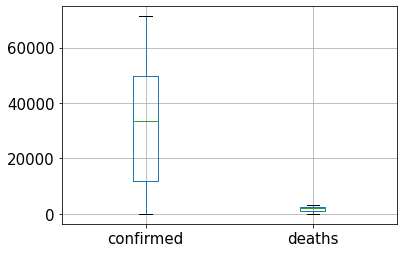

In [46]:
# x = confirmed e y = deaths
boxplot = covid19_manaus.boxplot(column=['confirmed','deaths'],fontsize=15)

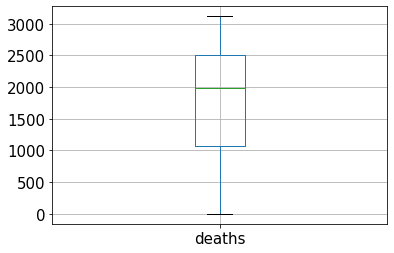

In [47]:
# x = deaths
boxplot_death = covid19_manaus.boxplot(column=['deaths'],fontsize=15)

<h3>4.2 - Bar Plot</h3>

<h4>I - Casos confirmados</h4>

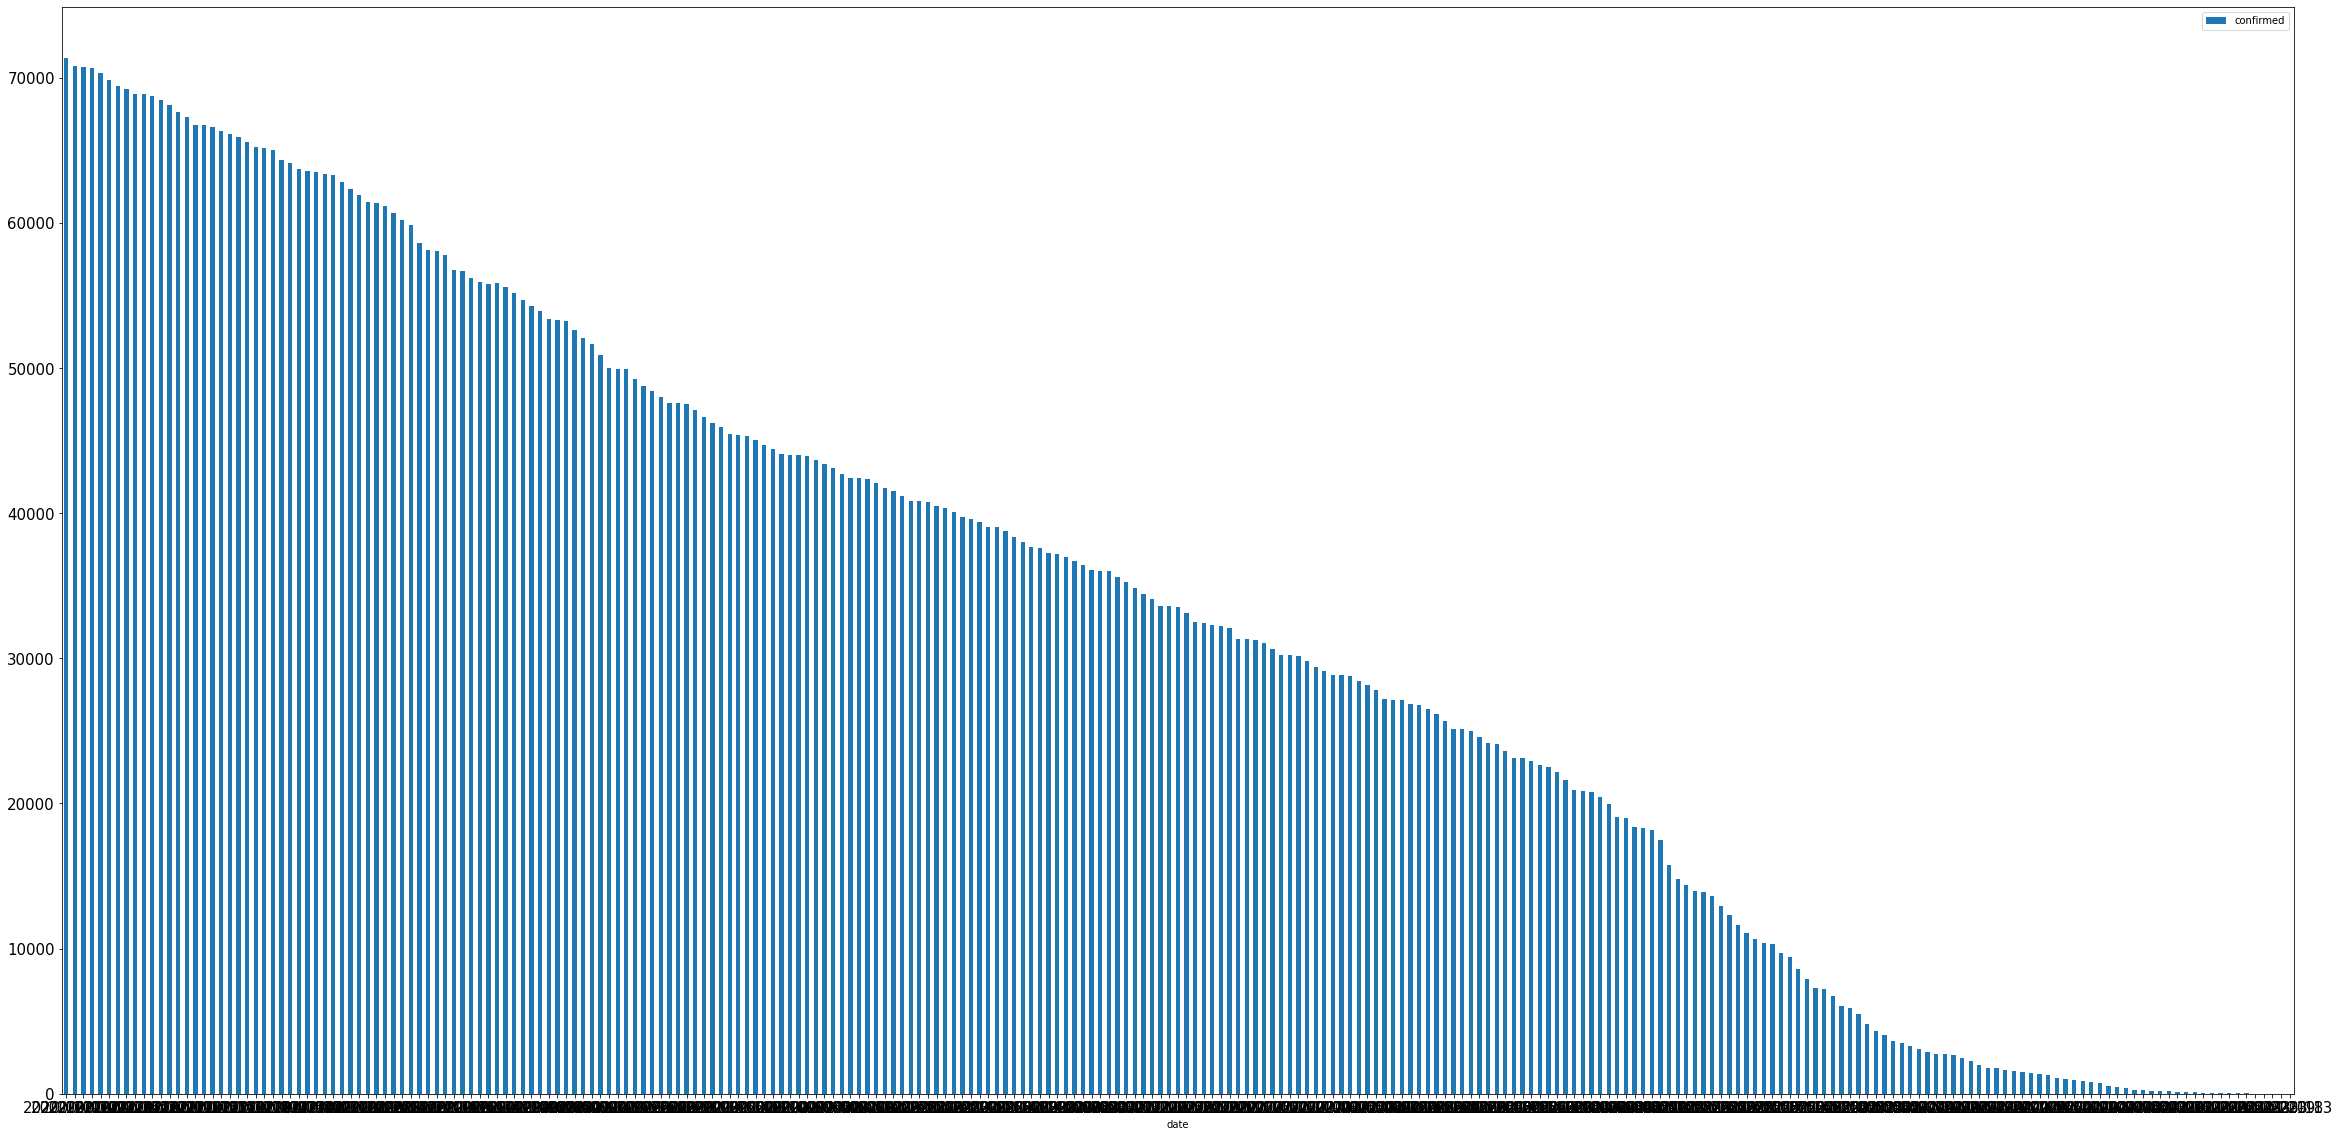

In [61]:
%matplotlib inline
covid19_manaus_filter = covid19_manaus[(covid19_manaus['date'] >= '2020-11-01') & (covid19_manaus['date'] <= '2020-11-31')]
ax_confirmed = covid19_manaus.plot.bar(y='confirmed', x='date', legend='Nº Covid 19 em Manaus',rot=0, fontsize=15, figsize=[40,20])
ax_confirmed

<h4>II - Casos mortes</h4>

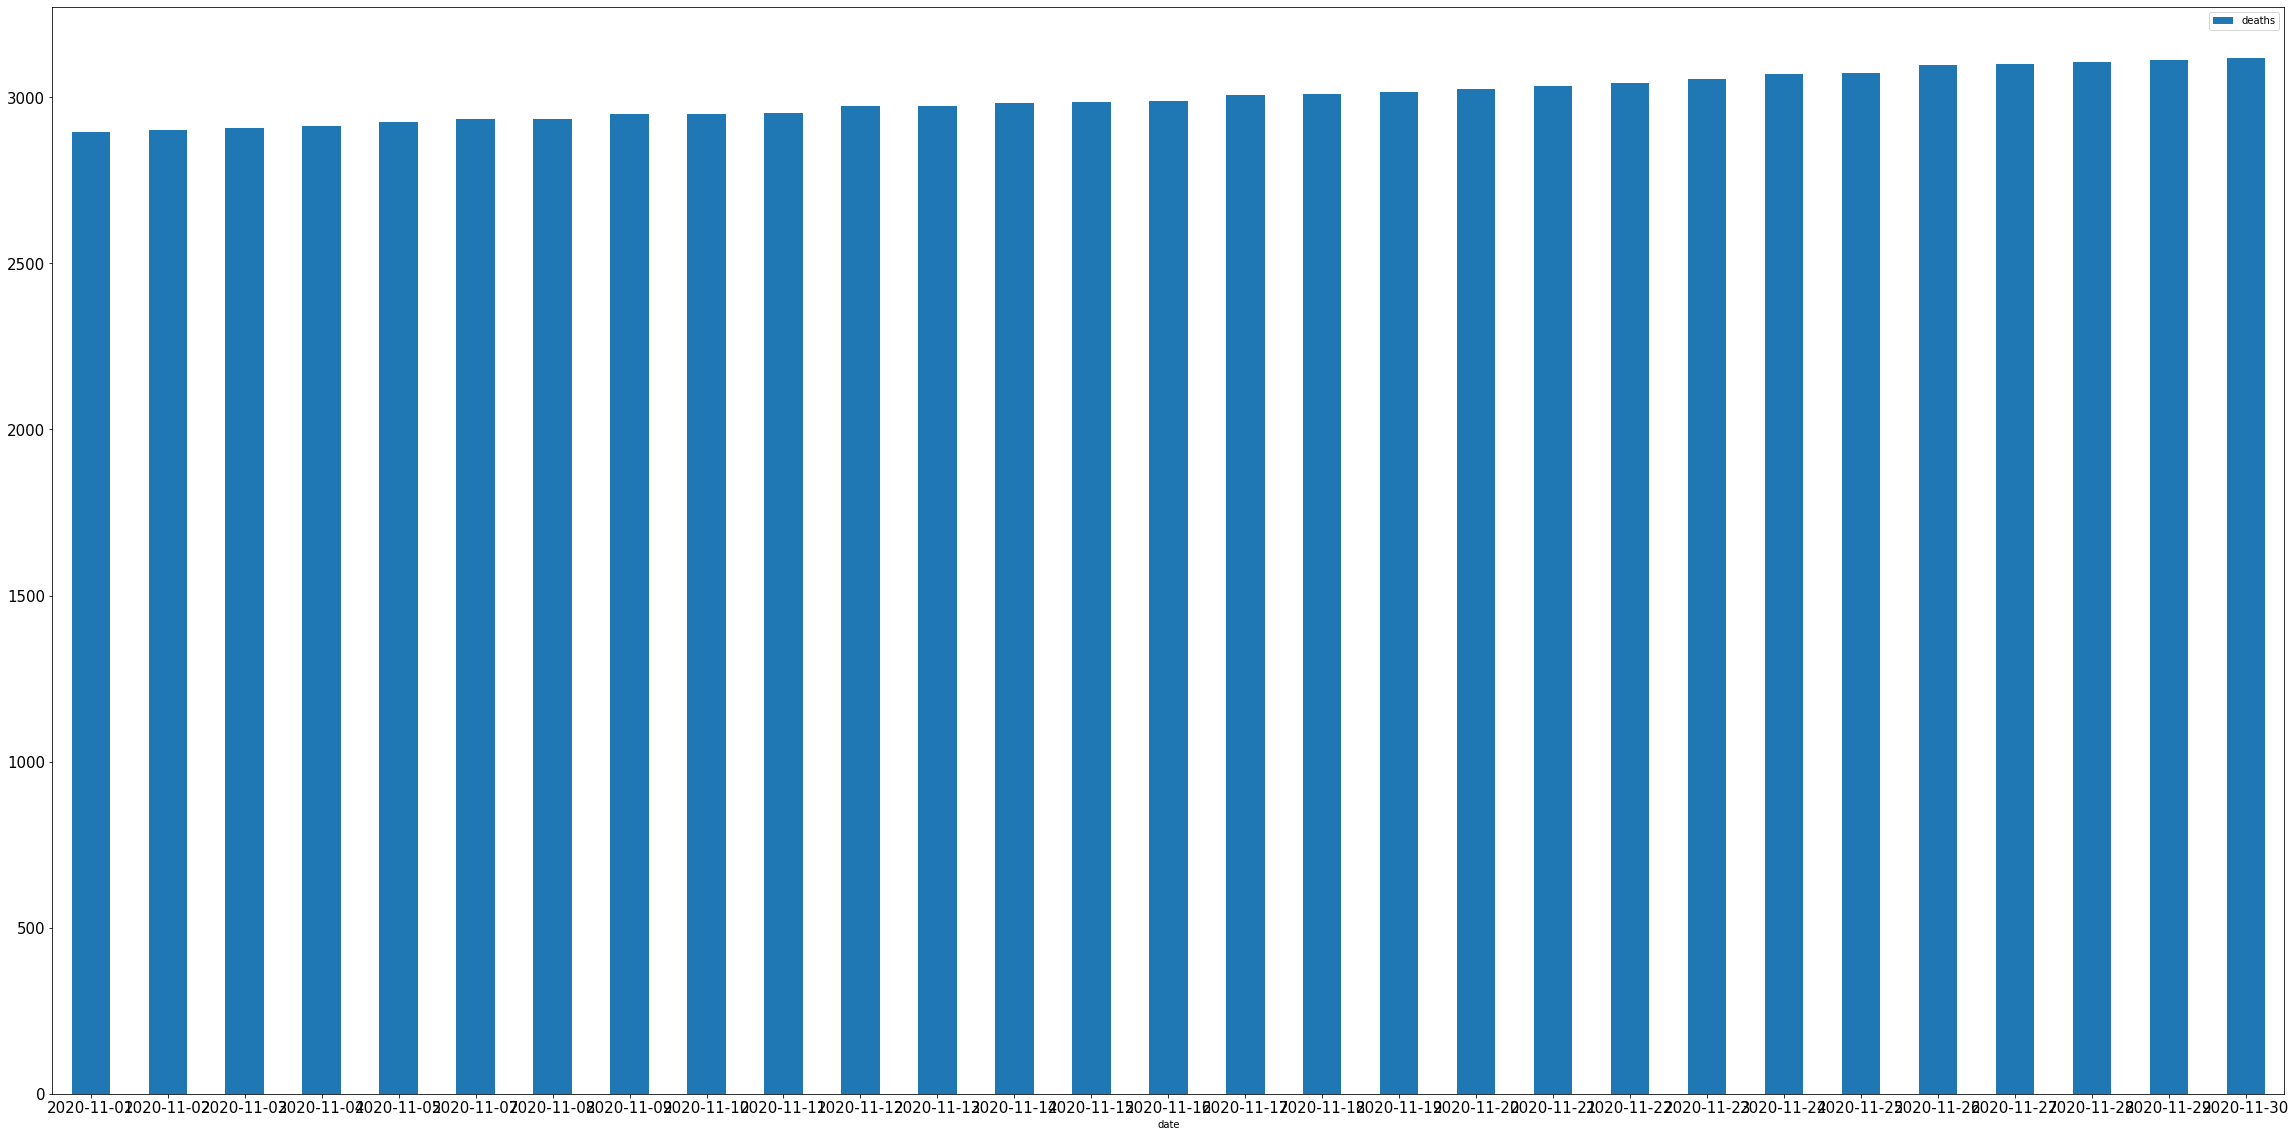

In [80]:
%matplotlib inline

filter_to_date = covid19_manaus[(covid19_manaus['date'] >= '2020-11-01') & (covid19_manaus['date'] <= '2020-11-31')].sort_values(by=['date'])
ax_deaths = filter_to_date.plot.bar(y='deaths', x='date', legend='Nº Covid 19 em Manaus',rot=0, fontsize=15, figsize=[40,20])
ax_deaths

In [55]:
from plotnine import ggplot, aes, geom_bar

In [ ]:
df = pd.DataFrame({"x":[1,2,3,4], "y":[1,3,4,2]})
ggplot(aes(x="x", weight="y"), df) + geom_bar()

In [77]:
# ggplot(aes(x="x", weight="deaths"), covid19_manaus) + geom_bar()

In [78]:
# data_filter = covid19_manaus[(covid19_manaus['date'] > '2020-03-01') & (covid19_manaus['date'] < '2020-03-31')]
data_filter = covid19_manaus[(covid19_manaus['date'] >= '2020-11-01') & (covid19_manaus['date'] <= '2020-11-31')].sort_values(by=['date'])

In [79]:
data_filter

,date,confirmed,deaths,death_rate
17022,2020-11-01,63504,2895,0.0456
17021,2020-11-02,63557,2902,0.0457
17020,2020-11-03,63705,2906,0.0456
17019,2020-11-04,64092,2913,0.0455
17018,2020-11-05,64341,2926,0.0455
17017,2020-11-07,65015,2934,0.0451
17016,2020-11-08,65151,2935,0.0450
17015,2020-11-09,65213,2949,0.0452
17014,2020-11-10,65570,2951,0.0450
17013,2020-11-11,65886,2952,0.0448
